Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***Изучим данные из таблицы query_1.csv***

In [2]:
df_model = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')

In [3]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df_model = df_model.sort_values(by='flights_amount', ascending=False).reset_index(drop=True)

In [5]:
df_model

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


В таблице отсутствуют пропуски, формат данных верный. Таблица отсортирована по уменьшению количества рейсов.

***Изучим данные из таблицы query_3.csv***

In [6]:
df_city = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

In [7]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
df_city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [9]:
df_city['city'].nunique()

101

In [10]:
df_city['city'].unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

Пропусков в таблице df_city нет. Количество уникальных городов, соответствует количеству строк, дубликаты отсутствуют.

Создадим таблицу с топ-10 городов по количеству пребывающих рейсов за день в сентябре 2018 года.

In [11]:
top10_df_city = df_city.sort_values(by='average_flights', ascending=False).head(10)

In [12]:
top10_df_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Вычислим доли количества перелетов для каждого типа самолета в сентябре 2018 года.

In [13]:
df_model['per_flights_amount'] = ((df_model['flights_amount'] / df_model['flights_amount'].sum()) * 100).round(2)

In [14]:
df_model

,model,flights_amount,per_flights_amount
0,Cessna 208 Caravan,4557,27.98
1,Bombardier CRJ-200,4446,27.30
2,Sukhoi SuperJet-100,4185,25.70
3,Airbus A321-200,960,5.89
4,Boeing 737-300,630,3.87
5,Airbus A319-100,607,3.73
6,Boeing 767-300,600,3.68
7,Boeing 777-300,300,1.84


In [15]:
df_model['per_flights_amount'][0:3].sum()

80.98

Практически 81% перелетов приходятся на три типа самолетов:
- Cessna 208 Caravan - 27.98%;
- Bombardier CRJ-200 - 27.30%;
- Sukhoi SuperJet-100 - 25.70%.  

Эти самолеты характеризуются сравнительно не большой вместимостью пассажиров и малой дальностью полета.

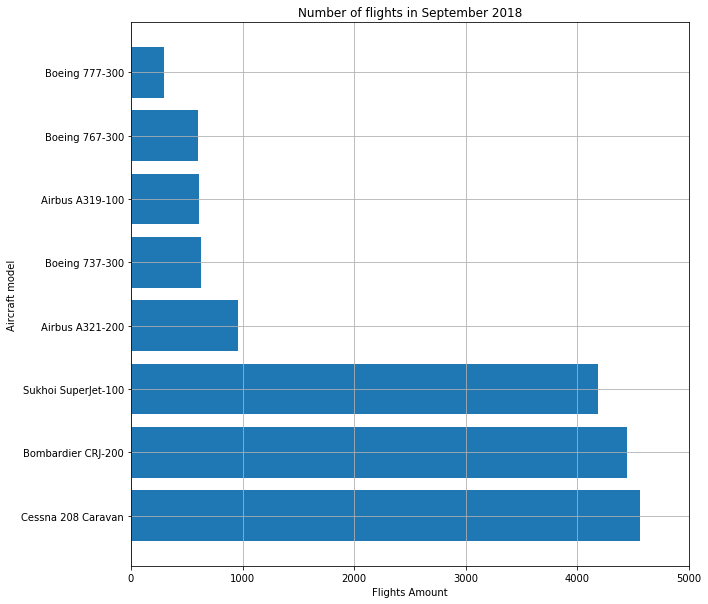

In [16]:
group_data = df_model['flights_amount']
group_names = df_model['model']
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(group_names, group_data)
ax.set(xlim=[0, 5000], xlabel='Flights Amount', ylabel='Aircraft model',
       title='Number of flights in September 2018')
plt.grid(True)
plt.show()

Отсортруем данные в таблице df_city по уменьшению количества рейсов для каждого города.

In [17]:
df_city_sort = df_city.sort_values(by='average_flights', ascending=False)

Вычислим доли среднего количеста рейсов, прибывающих в город (city) за день в сентябре 2018 года.

In [18]:
df_city_sort['per_flights'] = ((df_city_sort['average_flights'] / df_city_sort['average_flights'].sum()) * 100).round(2)

Создадим столбец `cumsum` вычисляющий сумму с накопленным итогом. 

In [19]:
df_city_sort['cumsum'] = df_city_sort['per_flights'].cumsum()
df_city_sort.reset_index(drop=True).head(20)

,city,average_flights,per_flights,cumsum
0,Москва,129.774194,23.39,23.39
1,Санкт-Петербург,31.161290,5.62,29.01
2,Новосибирск,17.322581,3.12,32.13
3,Красноярск,11.580645,2.09,34.22
4,Екатеринбург,11.322581,2.04,36.26
5,Ростов-на-Дону,10.193548,1.84,38.10
6,Пермь,10.129032,1.83,39.93
7,Брянск,10.000000,1.80,41.73
8,Сочи,9.612903,1.73,43.46
9,Ульяновск,9.580645,1.73,45.19


Как мы видим в среднем половниа прилетов приходятся на 13 городов.  

В первой пятерке крупные транспортные региональные узлы.  

Абсолютным лидером по количеству прибывающих рейсов является Москва - ~23%.

Построим гистограмму количества рейсов для каждого города.

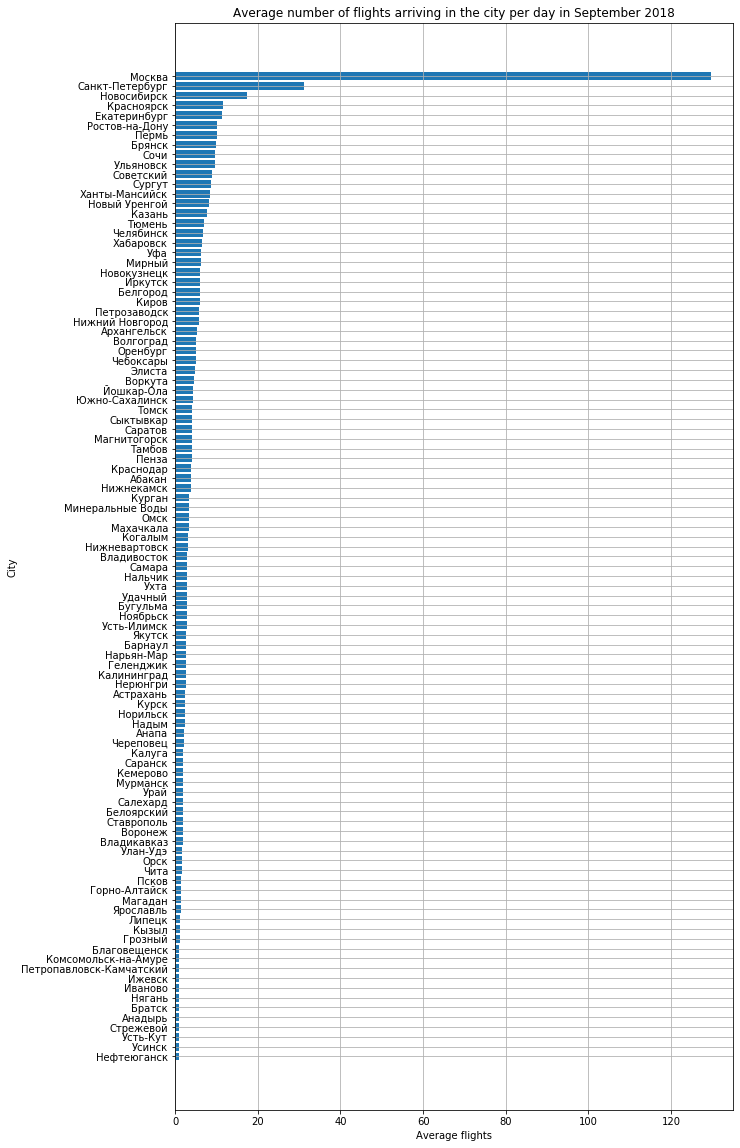

In [20]:
df_city_sort2 = df_city_sort.sort_values(by='average_flights', ascending=True)
group_names = df_city_sort2['city']
group_data = df_city_sort2['average_flights']
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(group_names, group_data)
ax.set(xlim=[0, 135], xlabel='Average flights', ylabel='City',
       title='Average number of flights arriving in the city per day in September 2018')
plt.grid(True)
plt.show()

Построим гистограмму для топ-10 городов по количеству прибывающих рейсов. 

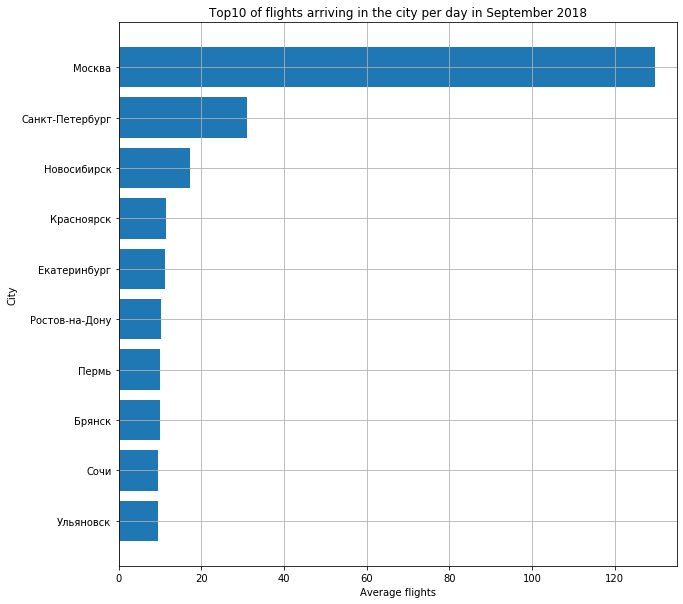

In [21]:
top10_df_city2 = top10_df_city.sort_values(by='average_flights', ascending=True)
group_names = top10_df_city2['city']
group_data = top10_df_city2['average_flights']
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(group_names, group_data)
ax.set(xlim=[0, 135], xlabel='Average flights', ylabel='City',
       title='Top10 of flights arriving in the city per day in September 2018')
plt.grid(True)
plt.show()

# Вывод

Пропуски и дубликаты в таблицах отсутвуют. Данные имеют верный формат.  
Создана таблица городов лидеров по количеству прибывающих рейсов в среднем в день для сентября 2018 года - `top10_df_city`.  

Для каждой таблицы созданы гистограммы.  

Практически **81% перелетов** приходятся на три типа самолетов:  
- Cessna 208 Caravan - 27.98%;
- Bombardier CRJ-200 - 27.30%;
- Sukhoi SuperJet-100 - 25.70%.

В среднем половниа прилетов приходятся на **13 городов**.

Абсолютным лидером по количеству прибывающих рейсов является Москва - **~23%**.  
